In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from node import node
from copy import deepcopy
import scipy.stats as stats


In [2]:
# HNSC
# Set Input Data
# HNSC TCI MUT
S_Ai = pd.read_csv("chunhui/Output/HNSC/S_Ai_clu.csv", header=0, index_col=0)
S_Ai.index = [ele[0:12] for ele in S_Ai.index]
S_Ai_f = ["TCGA-F7-8489", "TCGA-CV-A6K2", "TCGA-D6-6827" ]

S_Mi = pd.read_csv("chunhui/Input/HNSC/TCGA/S_Mi.csv", header=0, index_col=0)
S_Mi.index = [ele[0:12] for ele in S_Mi.index]

S_At = pd.read_csv("chunhui/Output/HNSC/S_A_clu.csv", header=0, index_col=0)
S_At_f = ["TCGA-KU-A66T", "TCGA-UF-A7JJ", "TCGA-UF-A7JD"]

S_M = pd.read_csv("chunhui/Input/HNSC/TCGA/S_M.csv", header=0, index_col=0)
S_M.index = [ele[0:12] for ele in S_M.index]

# HNSC TCI PRO
S_Pci = pd.read_csv("chunhui/Output/HNSC/S_Pci_clu.csv", header=0, index_col=0)
S_Pci.index = [ele[0:12] for ele in S_Pci.index]
S_Pci_f = ["TCGA-CR-7370", "TCGA-CV-5441", "TCGA-CV-A45O"]  # ct PRO

# HNSC TCI DEG
S_Dci = pd.read_csv("chunhui/Output/HNSC/S_Dci_clu.csv", header=0, index_col=0)
S_Dci.index = [ele[0:12] for ele in S_Dci.index]
S_Dci_f = ["TCGA-CV-7253","TCGA-P3-A6T3", "TCGA-TN-A7HJ"] # ct DEG

# All DEG
S_Dcai = pd.read_csv("chunhui/Output/HNSC/S_Dct_clu.csv", header=0, index_col=0)
S_Dcai.index = [ele[0:12] for ele in S_Dcai.index]
S_Dcai_f = ["TCGA-BB-4227", "TCGA-CN-6994","TCGA-CR-7398"]

hpv = pd.read_csv("chunhui/Input/HNSC/PORT/HNSC_hpvstates.csv", header=0, index_col=0)
hpv.loc[hpv["x"] == "hpvneg", "x"] = 0
hpv.loc[hpv["x"] == "hpvpos", "x"] = 1
hpv.loc[pd.isna(hpv["x"]), "x"] = 0.5
hpv = pd.DataFrame(np.int64(hpv), index=hpv.index, columns=["HPV"])


# TCGA subtyping gene
paper_l = [
    "AADAT", "AASS", "ABCB10", "ABCB6", "ABCC1", "ABCC3", "ABCC5", "ABHD1", "ABHD10", "ABI2", "ACAP2", "ACTL6A", "ADAM11", "ADAM17", "ADAM23", "ADCY10", "ADD2", "ADD3", "ADSS", "AGPAT5", "AGPAT9", "AK7", "AKAP1", "AKAP8", 
    "AKR1C1", "AKR1C3", "ALCAM", "ALDH1A1", "ALG10", "ALG3", "ALMS1", "ALMS1P", "ALOX12P2", "ANAPC11", "ANGEL2", "ANKRD40", "ANP32E", "ANXA10", "AP3M2", "APEX1", "APOA1BP", "APOBEC3D", "APOBEC3F", "APOOL", "AQP11", "ARHGAP8", 
    "ARID4B", "ARL13B", "ARMC8", "ARMCX6", "ARSJ", "ASF1A", "ASNS", "ASPM", "ATAD2", "ATAD5", "ATF2", "ATP1B1", "ATP2B1", "ATP2C1", "ATP4A", "ATP6V1B1", "ATP8B3", "ATRN", "ATXN10", "B3GALNT2", "B4GALNT1", "B4GALT4", "BAZ1A", "BCAT1",
    "BCL7A", "BDNF", "BEX2", "BEX5", "BFSP1", "BHMT", "BID", "BIK", "BOD1", "BOLA3", "BRAF", "BRCA1", "BRCA2", "BRIP1", "BRMS1L", "BUB1", "BUB1B", "C10orf82", "C11orf88", "C12orf32", "C12orf47", "C12orf48", "C12orf66", "C14orf101", 
    "C14orf167", "C15orf23", "C15orf33", "C16orf59", "C16orf61", "C16orf63", "C16orf75", "C17orf53", "C17orf69", "C17orf75", "C17orf90", "C19orf2", "C19orf63", "C1D", "C1orf107", "C1orf124", "C1orf131", "C1orf27", "C1orf31", "C1orf35",
    "C1orf51", "C1orf57", "C20orf3", "C21orf90", "C2orf44", "C2orf86", "C3orf21", "C3orf34", "C3orf58", "C6orf162", "C6orf167", "C6orf168", "C7orf27", "C8orf51", "C9orf100", "C9orf125", "C9orf30", "C9orf43", "CA9", "CABYR", "CALB1", "CALCB", 
    "CAMSAP1L1", "CASC5", "CASK", "CBLL1", "CBX1", "CBX6", "CCDC126", "CCDC136", "CCDC150", "CCDC46", "CCL26", "CCNB1IP1", "CCT3", "CD9", "CDC45", "CDCA3", "CDCA5", "CDK19", "CDK4", "CDK8", "CEBPZ", "CENPF", "CENPJ", "CENPN", "CENPO", "CEP152", 
    "CEP290", "CEP70", "CES1", "CHAF1A", "CHCHD7", "CHD1L", "CHD6", "CHEK2", "CHRM2", "CHRM3", "CHST7", "CHTF18", "CKS1B", "CLCN2", "CLCN5", "CLK2", "CLTC", "CNIH4", "CNST", "CNTNAP2", "COCH", "COG2", "COIL", "COL11A2", "COL20A1", "COMMD2", "COPB2", 
    "CORO1C", "CORO2A", "COX7A2L", "CREB5", "CREG2", "CS", "CSNK1D", "CT45A1", "CTCFL", "CTPS2", "CXCR7",
    "CXorf57", "CXorf61", "CYP26A1", "CYP2S1", "CYP4F11", "DARS2", "DBF4", "DCUN1D1", "DDX39", "DDX59", "DGKG", "DHFRL1", "DHX36", "DHX9", "DIP2B", "DKC1", "DLEC1", "DLG1", "DLX6", "DMRT2", "DMRT3", "DNA2", "DNAH14", "DNAJB11", "DNAJC30", "DNMT3A", "DPPA2", 
    "DPYSL4", "DSCC1", "DSCR6", "DSG2", "DTL", "DUSP12", "DUSP19", "DVL3", "DZIP1L", "E2F6", "ECE2", "ECT2", "EFNA1", "EFS", "EGF", "EGLN1", "EHHADH", "EIF1", "EIF2B5", "EIF2C2", "EIF4A2", "ELK4", "EN1", "ENO2", "ENTPD6", "EPB49", "EPCAM", "EPDR1", "EPR1", 
    "ESCO2", "ETV1", "ETV4", "ETV5", "EXO1", "EXOC6", "F11R", "FADS1", "FAM119A", "FAM120C", "FAM158A", "FAM161A", "FAM169A", "FAM189B", "FAM200A", "FAM20B", "FAM36A", "FAM55C", "FAM64A", "FAM71F1", "FAM72A", "FAM90A1", "FANCI", "FBN2", "FBXL21", "FBXO11", 
    "FBXO15", "FBXO21", "FBXO28", "FEN1", "FGF12", "FGF19", "FGFBP2", "FLAD1", "FLJ39653", "FLVCR1", "FMN2", "FOLH1", "FOLH1B", "FOXK2", "FOXM1", "FREM1", "FSTL4", "FSTL5", "FXR1", "FZD3", "FZD6", "FZD7", "GABPB1", "GABRA5", "GABRB3", "GABRG3", "GALNT8",
    "GAP43", "GATAD1", "GBA3", "GCGR", "GCLC", "GCNT2", "GCSH", "GDAP1", "GDF9", "GDI1", "GFM1", "GGT7", "GINS1", "GINS2", "GJB7", "GLRX5", "GLT25D2", "GMCL1", "GMPS", "GNA13", "GNAZ", "GNG4", "GNGT1", "GNPAT", "GOLIM4", "GPC3", "GPI", "GPR161", "GPR176",
    "GPR19", "GPR27", "GPR98", "GPX2", "GSPT2", "GSTA1", "GSTA2", "GSTA3", "GSTA4", "GSTA5", "GSTM1", "GSTM2", "GSTM3", "GSTM4", "GTF2I", "GTF2IP1", "GTF3C3", "GTSE1", "GUCY1B2", "HAUS4", "HDGF", "HDGFRP3", "HEY1", "HGSNAT", "HHAT", "HHIPL2", "HJURP", "HMG20B",
    "HMGB3L1", "HMGXB4", "HNRPLL", "HOXA10", "HOXA11", "HOXA13", "HOXA5", "HOXA9", "HOXB13", "HOXB5", "HOXB6", "HOXB7", "HOXB9", "HOXC10", "HOXC12", "HOXC8", "HOXC9", "HOXD13", "HPS3", "HS3ST5", "HSCB", "HSP90AA1", "HSPD1", "HSPE1", "IARS2", "ICK", "IDH1", "IGF1R",
    "IGSF11", "ILF2", "INTU", "IPO4", "IPO9", "IQGAP3", "IRF2BP2", "ITPKA", "ITPKB", "JAKMIP2", "JOSD1", "KCNG3", "KCNH8", "KCNJ14", "KCNK1", "KCNMB3", "KCNS3", "KDM3A", "KIAA0146", "KIAA0319", "KIAA0406", "KIAA0907", "KIAA1715", "KIAA1804", "KIF11", "KIF14", "KIF18A", 
    "KIF23", "KIF4A", "KIRREL2", "KLHDC5", "KLHDC9", "KLHL11", "KLHL12", "KLHL13", "KLHL15", "KLHL23", "KLHL24", "KNTC1", "KRTCAP3", "LAPTM4B", "LASS2", "LASS5", "LATS1", "LBX2", "LCLAT1", "LGALS8", "LGSN", "LIG3", "LIM2", "LMAN2L", "LMNB2", "LOC100303728", "LOC152217", "LOC389458", "LOC400027", "LOC440040", "LOC728613", "LOC729082", "LONRF1", "LOXL4", "LPHN1", "LPP", "LPPR1", "LRP12", "LRP3", "LRP8", "LRRC34", "LRRC37B", "LRRC37B2", "LRRC4", "LRRC58", "LSG1", "LTBP4", "MAEL", "MAFG", "MAGEA10", "MAGEA11", "MAGEA4", "MAGEA9B", "MAGEB6", "MAGEC2", "MAGED4B", "MAP1B", "MAP2K6", "MAP4K3", "9-Mar", "MARK1", "MARS2", "MASTL", "MBIP", "MBTPS2", "MC1R", "MCCC1", "MCM10", "MCM4", "MCM7", "MDM4", "ME1", "MEST", "METTL1", "MEX3A", "MEX3B", "MFN1", "MGC4473", "MIB1", "MLC1", "MLF1", "MLLT11", "MNAT1", "MORC2", "MOSC1", "MPHOSPH9", "MPP3", "MPPED1", "MRAP2", "MRPL3", "MRPL47", "MRPL55", "MSH6", "MSI2", "MSL1", "MTERF", "MTL5", "MTMR4", "MTR", "MYNN", "MYO19", "NAP1L2", "NARG2", "NAT8L", "NCAPD2",
    "NCAPH", "NCBP2", "NCRNA00086", "NDRG4", "NDUFB9", "NEDD4L", "NEK2", "NELL2", "NENF", "NFE2L2", "NFYB", "NGDN", "NIPA1", "NKAIN2", "NLGN1", "NLK", "NLN", "NMB", "NMD3", "NOL10", "NOVA1", "NPM2", "NPR2", "NPR3", "NQO1", "NRCAM", "NRL", "NSL1", "NT5C3L", "NTRK2", "NTS", "NUCKS1", "NUDT1", "NUDT10", "NUDT11", "NUF2", "NUPL2", "NXF2", "ODC1", "ORAOV1", "ORC2L", "ORC6L", "OSGIN1", "OTX1", "PAGE2", "PAGE5", "PAK1", "PAK2", "PAK7", "PAPOLA", "PAQR3", "PARD3", "PARL", "PARP2", "PAX6", "PBK", "PCBP2", "PCCB", "PCDH19", "PCDHB11", "PCDHB2", "PCDHB3", "PCDHB6", "PCDHB7", "PCDHB8", "PCID2", "PCYT1B", "PDCD10", "PEX13", "PFKFB4", "PFN2", "PGAP1", "PGK1", "PGM5P2", "PGRMC1", "PHACTR3", "PHC3", "PHKA1", "PHLDB2", "PHTF2", "PIAS2", "PIGM", "PIGZ", "PIK3CA", "PIR", "PLA2G10", "PLAG1", "PLAGL2", "PLCB1", "PLCB4", "PLK5P", "PNCK", "PNMAL1", "PNO1", "PNPT1", "PODXL2", "POLR2H", "POMC", "POTEB", "POTEE", "POTEF", "PPFIA1", "PPP1R13B", "PPP1R16A", "PPP2R5A", "PPPDE1", "PPT1", "PRAME", "PRC1", "PRCC", "PRDM13", "PRELID2", "PRKAB2", "PRKCI", "PRKX", "PRR7", "PRTFDC1", "PSAT1", "PSMB4", "PSMB5", "PSMC1", "PSMD11", "PSMD2", "PTCH1", "PTDSS1", "PTGES3", "PTPLAD1", "PYCR1", "PYCR2", "QSER1", "RAB2B", "RAB34", "RAB3B", "RAB3IP", "RAB40B", "RAB6B", "RAD21", "RAD51", "RAD51AP1", "RAD51L3", "RAD54B", "RAD54L", "RAGE", "RALGAPA1", "RANBP1", "RASL11A", "RASSF9", "RBM12B", "RBM19", "RBM23", "RBM34", "RBM8A", "RBPMS2", "RCN2", "RCOR3", "RECQL4", "RFC3", "RFC4", "RFWD2", "RHBDD3", "RIC8B", "RIMKLA", "RIT1", "RNF175", "RNF2", "RNF216", "RNF7", "RNFT2", "RPL22L1", "RPL39L", "RPP25", "RPS6KA6", "RPS6KC1", "RSRC1", "RTKN", "RYK", "SALL4", "SAMD12", "SATB2", "SCAND3", "SCHIP1", "SCN1A",
    "SCN2A", "SCN8A", "SCUBE3", "SDK1", "SEC14L4", "SEC62", "SELT", "SEMA3D", "SEMA4F", "SEMA6D", "SENP2", "SENP5", "12-Sep", "SERHL2", "SESN3", "SETD8", "SFRS13B", "SFXN1", "SGEF", "SGOL2", "SHC4", "SIAH2", "SIPA1L2", "SIX1", "SIX4", "SKA1", "SLC10A4", "SLC13A5", "SLC16A14", "SLC20A2", "SLC25A17", "SLC25A36", "SLC25A40", "SLC29A4", "SLC30A3", "SLC30A6", "SLC33A1", "SLC35B1", "SLC44A1", "SLC45A4", "SLC47A1", "SLC4A3", "SLC5A11", "SLC6A10P", "SLC6A8", "SLC7A11", "SLC7A8", "SLC9A9", "SLCO1A2", "SLCO3A1", "SMARCA5", "SMC2", "SMC4", "SMC5", "SMG7", "SMO", "SMOX", "SMS", "SMYD3", "SNAP47", "SNRNP27", "SNRPE", "SNRPG", "SNX13", "SNX27", "SNX5", "SOSTDC1", "SOX12", "SOX2", "SOX5", "SPAG5", "SPATA20", "SPATA22", "SPESP1", "SPIN1", "SPP1", "SPR", "SPRED1", "SPRY2", "SR140", "SRPRB", "SRRM3", "SRXN1", "SSFA2", "ST13", "ST6GALNAC2", "STK31", "STK32B", "STK33", "STOX2", "STRBP", "STRC", "STXBP4", "STXBP5L", "STXBP6", "SULT4A1", "SUPT16H", "SUPT3H", "SV2A", "SYT1", "TADA2A", "TAF1A", "TARBP1", "TBCCD1", "TBL1X", "TBL1XR1", "TBL2", "TBPL1", "TCF15", "TDH", "TERF1", "TET3", "TEX19", "TFB1M", "TFRC", "TH1L", "THOC5", "TIA1", "TK1", "TKT", "TLX2", "TM4SF1", "TM9SF1", "TMEFF1", "TMEM117", "TMEM132A", "TMEM14A", "TMEM158", "TMEM183A", "TMEM194A", "TMEM202", "TMEM216", "TMEM22", "TMEM38B", "TMEM44", "TMEM81", "TMEM9", "TMEM97", "TMEM98", "TMPO", "TMSB15B", "TMTC1", "TMTC3", "TMTC4", "TMX1", "TNC", "TNFRSF18", "TNKS", "TNNI3", "TOM1L1", "TOMM20", "TOP1MT", "TOP2A", "TOPBP1", "TPST1", "TPTE", "TRIB2", "TRIM11", "TRIM2", "TRIM45", "TRIM59", "TROAP", "TRPC1", "TSEN15", "TSGA14", "TSNAX", "TSPAN7", "TTBK2", "TTC14", "TTC25", "TTC30A", "TTC30B", "TTF2", "TTK", "TTL", "TUBGCP4", "TUSC3", "TXNRD1", "UBE2C", "UBE2Q1", "UBE2S", "UBE2T", "UBQLN1", "UBXN2A", "UCHL1", "UGDH", "UGT8", "UNC119", "UPK1B", "URB2", "USP28", "USP39", "UST", "UXS1", "VAX2", "VCX", "VCX2", "VCX3A", "VCY", "VEZT", "VKORC1L1", "VPS8", "VWDE", "WBSCR22", "WBSCR28", 
    "WDR45L", "WDR5", "WDR67", "WWTR1", "XCL1", "XCL2", "XPNPEP3", "XPO7", "XPOT", "XPR1", "XRCC6", "XRCC6BP1", "YDJC", "YEATS2", "YY1AP1", "ZBTB25", "ZBTB26", "ZBTB39", "ZBTB41", "ZDHHC2", "ZDHHC3", "ZDHHC4", "ZFHX3", "ZFP64", "ZIC1", "ZKSCAN5", "ZNF124", "ZNF174", "ZNF189", "ZNF227", "ZNF271", "ZNF280A", "ZNF322B", "ZNF334", "ZNF34", "ZNF419", "ZNF473", "ZNF507", "ZNF512", "ZNF551", "ZNF594", "ZNF606", "ZNF623", "ZNF639", "ZNF642", "ZNF643", "ZNF695", "ZNF7", "ZNF74", "ZNF77", "ZNRF3", "ZSCAN29"]


# Comprehensive Characterization of Cancer Driver Genes and Mutations
driver_l =  [
    "PIK3CA", "FBXW7", "PTEN", "FAT1", "EP300", "NFE2L2", "KMT2D", "ZNF750", "NSD1", "EPHA2", "RASA1",
    "HLA-A", "NOTCH1", "MAPK1", "HLA-B", "TGFBR2", "CASP8", "KEAP1", "CDKN2A", "TP53", "RB1","RHOA", 
    "FGFR3", "HRAS", "ARID2", "RAC1", "CUL3", "KDM6A"]

In [19]:
df = S_Dci

S_Dci_f = ["TCGA-CV-7253", "TCGA-P3-A6T3", "TCGA-TN-A7HJ"] # ct DEG

fen_l = S_Dci_f

In [20]:
g_l = []

idx_l = list(df.index)
id_l = [idx_l.index(ele) for ele in fen_l]
id_l.insert(0, 0)
id_l.insert(len(id_l), df.shape[0])

for i in range(len(id_l)-1):
    ele_ls = idx_l[id_l[i]: id_l[i+1]]
    g_l.append(ele_ls)

In [12]:
cli = pd.read_csv("chunhui/Input/HNSC/TCGA/HNSC_clinicalMatrix", sep="\t")
cli.index  = cli["sampleID"]
cli.index = [ele[0:12] for ele in cli.index]

In [192]:
# stage
stage = cli[["clinical_stage"]].fillna("NA")
# stage = cli[["pathologic_stage"]].fillna("NA")
stage[stage == 'Stage I'] = 1
stage[stage == 'Stage II'] = 2
stage[stage == 'Stage III'] = 3
stage[stage == 'Stage IVA'] = 4
stage[stage == 'Stage IVB'] = 5
stage[stage == 'Stage IVC'] = 6
stage[stage == 'NA'] = 3

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    
import scipy.stats as stats
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([1.42179508]), pvalue=array([0.23541421]))

Text(0, 0.5, 'Clinical Stage')

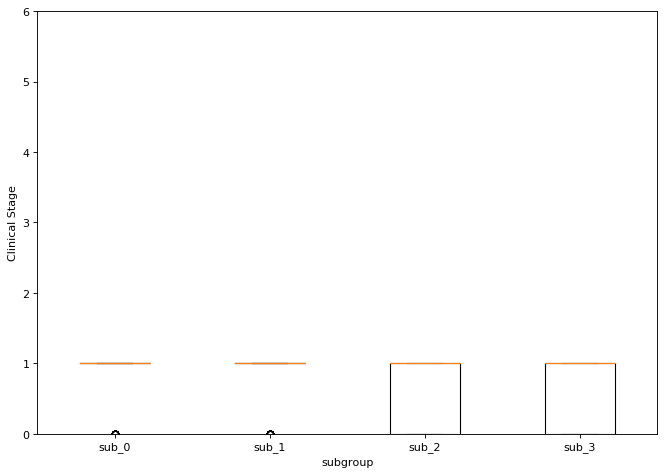

In [41]:
import matplotlib.pyplot as plt

x = [sub_0.iloc[:, 0].values.tolist(),
    sub_1.iloc[:, 0].values.tolist(),
    sub_2.iloc[:, 0].values.tolist(),
    sub_3.iloc[:, 0].values.tolist()]

plt.figure(figsize=(10,7), dpi= 80)
plt.boxplot(x)
plt.ylim(0,6)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("Clinical Stage")

In [15]:
# age
stage = cli[["age_at_initial_pathologic_diagnosis"]].fillna(0)
stage[stage["age_at_initial_pathologic_diagnosis"] == 0] = 60
# np.sum(stage, 0)/(stage.shape[0] - np.sum(stage[stage == 0], 0))

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]

stats.f_oneway(sub_0, sub_3)
# stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([1.94940821]), pvalue=array([0.16395152]))

Text(0, 0.5, 'Age')

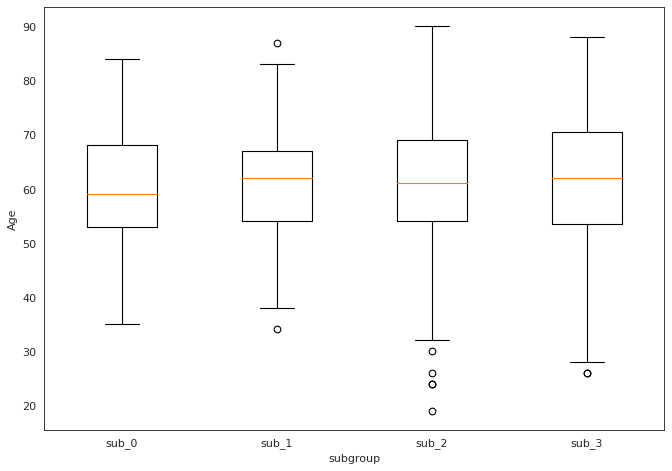

In [306]:
import matplotlib.pyplot as plt

x = [sub_0.iloc[:, 0].values.tolist(),
    sub_1.iloc[:, 0].values.tolist(),
    sub_2.iloc[:, 0].values.tolist(),
    sub_3.iloc[:, 0].values.tolist()]

plt.figure(figsize=(10,7), dpi= 80)
plt.boxplot(x)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("Age")

In [35]:
# gender
stage = cli[["gender"]].fillna("NA")
print(np.unique(stage["gender"]))
stage[stage["gender"] == "FEMALE"] = 0
stage[stage["gender"] == "MALE"] = 1

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    print(np.mean(locals()["sub_" + str(i)]))
    print(len(locals()["sub_" + str(i)]))
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

['FEMALE' 'MALE']
gender    0.811881
dtype: float64
101
gender    0.825175
dtype: float64
143
gender    0.629213
dtype: float64
178
gender    0.697842
dtype: float64
139


F_onewayResult(statistic=array([6.81550714]), pvalue=array([0.00016198]))

In [319]:
import matplotlib.pyplot as plt

x = [sub_0.iloc[:, 0].values.tolist(),
    sub_1.iloc[:, 0].values.tolist(),
    sub_2.iloc[:, 0].values.tolist(),
    sub_3.iloc[:, 0].values.tolist()]

plt.figure(figsize=(10,7), dpi= 80)
plt.pyplot(x)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("Gender")

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

<Figure size 800x560 with 0 Axes>

In [311]:
# smoking
stage = cli[["tobacco_smoking_history"]].fillna(3)

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    print(np.mean(locals()["sub_" + str(i)]))
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

tobacco_smoking_history    2.564356
dtype: float64
tobacco_smoking_history    2.825175
dtype: float64
tobacco_smoking_history    2.348315
dtype: float64
tobacco_smoking_history    2.381295
dtype: float64


F_onewayResult(statistic=array([5.71191813]), pvalue=array([0.00074363]))

Text(0, 0.5, 'Tobacco_smoking_history')

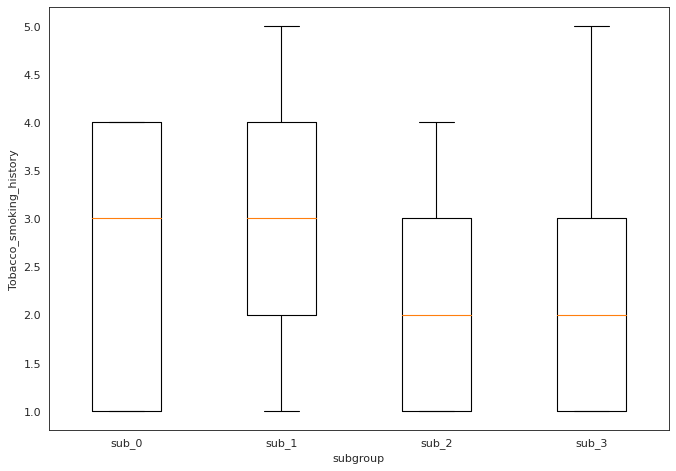

In [312]:
import matplotlib.pyplot as plt

x = [sub_0.iloc[:, 0].values.tolist(),
    sub_1.iloc[:, 0].values.tolist(),
    sub_2.iloc[:, 0].values.tolist(),
    sub_3.iloc[:, 0].values.tolist()]

plt.figure(figsize=(10,7), dpi= 80)
plt.boxplot(x)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("Tobacco_smoking_history")

In [313]:
# alcohol
stage = cli[["alcohol_history_documented"]].fillna("NA")

stage[stage == 'YES'] = 1
stage[stage == 'NO'] = 0
stage[stage == 'NA'] = 0.5

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([0.35683713]), pvalue=array([0.78421358]))

Text(0, 0.5, 'Alcohol_history_documented')

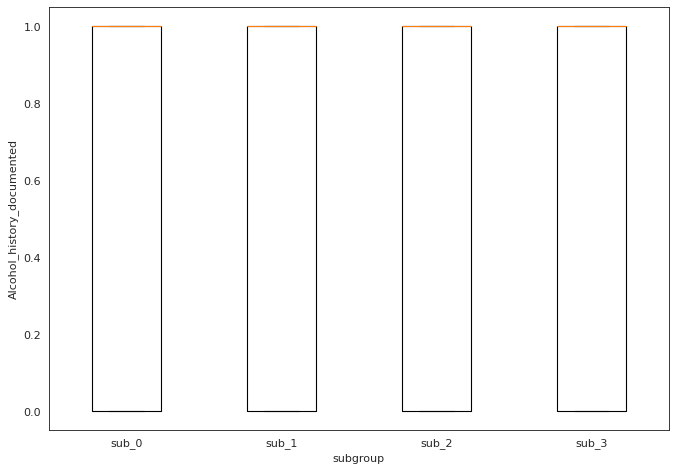

In [314]:
import matplotlib.pyplot as plt

x = [sub_0.iloc[:, 0].values.tolist(),
    sub_1.iloc[:, 0].values.tolist(),
    sub_2.iloc[:, 0].values.tolist(),
    sub_3.iloc[:, 0].values.tolist()]

plt.figure(figsize=(10,7), dpi= 80)
plt.boxplot(x)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("Alcohol_history_documented")

In [315]:
# PNI metasesi, perineural_invasion_present
stage = cli[["perineural_invasion_present"]].fillna("NA")

stage[stage == 'YES'] = 1
stage[stage == 'NO'] = 0
stage[stage == 'NA'] = 0.5

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([3.46262257]), pvalue=array([0.01617038]))

Text(0, 0.5, 'PNI')

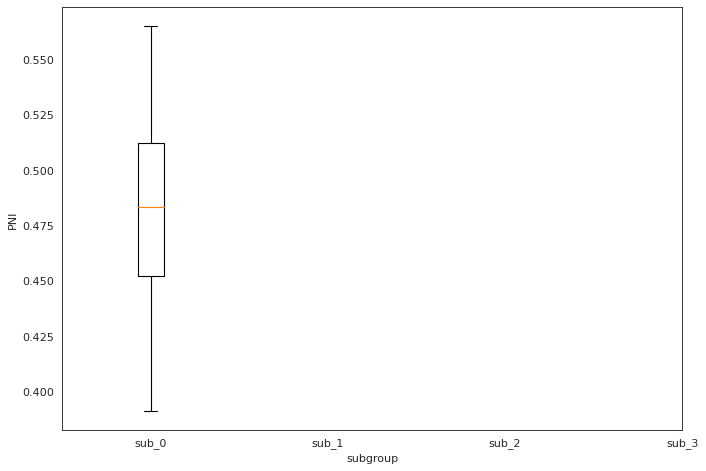

In [317]:
import matplotlib.pyplot as plt

x = [np.mean(sub_0.iloc[:, 0].values.tolist()),
    np.mean(sub_1.iloc[:, 0].values.tolist()),
    np.mean(sub_2.iloc[:, 0].values.tolist()),
    np.mean(sub_3.iloc[:, 0].values.tolist())]

plt.figure(figsize=(10,7), dpi= 80)
plt.boxplot(x)
plt.xticks([1,2,3,4], ["sub_0", "sub_1", "sub_2", "sub_3"])
plt.xlabel("subgroup")
plt.ylabel("PNI")

In [237]:
# solerval glend tumor, exxcl
stage = cli[["histological_type"]].fillna("NA")

stage[stage == 'Head & Neck Squamous Cell Carcinoma'] = 1
stage[stage == 'Head & Neck Squamous Cell Carcinoma, Spindle Cell Variant'] = 2
stage[stage == 'Head & Neck Squamous Cell Carcinoma Basaloid Type'] = 3

for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([9.32627667]), pvalue=array([5.03677164e-06]))

In [47]:
stage = S_Ai[["TP53"]]
for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    print(np.mean(locals()["sub_" + str(i)]))
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

TP53    0.274725
dtype: float64
TP53    0.923077
dtype: float64
TP53    0.762821
dtype: float64
TP53    0.822581
dtype: float64


F_onewayResult(statistic=array([54.2005307]), pvalue=array([3.20917976e-30]))

In [43]:
sub_o = pd.concat([sub_1, sub_2, sub_3], 0)
stats.f_oneway(sub_o, sub_0)

F_onewayResult(statistic=array([118.66681257]), pvalue=array([7.12218873e-25]))

In [48]:
stage = S_Ai[["NOTCH1"]]
for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    print(np.mean(locals()["sub_" + str(i)]))
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

NOTCH1    0.120879
dtype: float64
NOTCH1    0.188034
dtype: float64
NOTCH1    0.275641
dtype: float64
NOTCH1    0.209677
dtype: float64


F_onewayResult(statistic=array([2.95449597]), pvalue=array([0.03218285]))

In [46]:
sub_o = pd.concat([sub_1, sub_2, sub_3], 0)
stats.f_oneway(sub_o, sub_0)

F_onewayResult(statistic=array([123.84179159]), pvalue=array([8.83052138e-26]))

In [49]:
stage = S_Ai[["NSD1"]]
for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
    print(np.mean(locals()["sub_" + str(i)]))
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

NSD1    0.10989
dtype: float64
NSD1    0.333333
dtype: float64
NSD1    0.057692
dtype: float64
NSD1    0.040323
dtype: float64


F_onewayResult(statistic=array([22.39014883]), pvalue=array([1.36668046e-13]))

In [50]:
sub_o = pd.concat([sub_0, sub_2, sub_3], 0)
stats.f_oneway(sub_o, sub_1)

F_onewayResult(statistic=array([64.39578458]), pvalue=array([7.69832012e-15]))

In [248]:
stage = hpv[["HPV"]]
for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([0.55792515]), pvalue=array([0.64303982]))

In [30]:
# TMB
TMB = pd.read_csv("chunhui/Input/HNSC/TMB.csv", index_col=0, header=0)
TMB.index = [ele[0:12] for ele in TMB.index]
tmb = TMB.loc[TMB.index & S_Ai.index]

In [31]:
stage = tmb
for i in range(len(g_l)):
    locals()["sub_" + str(i)]= stage.loc[set(g_l[i]) & set(stage.index), :]
stats.f_oneway(sub_0, sub_1, sub_2, sub_3)

F_onewayResult(statistic=array([3.9824486]), pvalue=array([0.0080497]))

F_onewayResult(statistic=array([10.70555535]), pvalue=array([0.0011446]))